# Machine Learning Project - IA mention CentraleSupélec

Under the supervision of :

- Myriam TAMI

Students:

- Lucas Tramonte

# Libraries


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from sklearn.metrics import mean_absolute_percentage_error


# EDA

In [52]:
data_original = pd.read_csv('Assets/Data/welddb.data', delimiter='\s+', header=None)

In [53]:
data = data_original.copy()

# Name the columns
data.columns = [
    'Carbon concentration (weight%)', 
    'Silicon concentration (weight%)', 
    'Manganese concentration (weight%)', 
    'Sulphur concentration (weight%)', 
    'Phosphorus concentration (weight%)', 
    'Nickel concentration (weight%)', 
    'Chromium concentration (weight%)', 
    'Molybdenum concentration (weight%)', 
    'Vanadium concentration (weight%)', 
    'Copper concentration (weight%)', 
    'Cobalt concentration (weight%)', 
    'Tungsten concentration (weight%)', 
    'Oxygen concentration (ppm by weight)', 
    'Titanium concentration (ppm by weight)', 
    'Nitrogen concentration (ppm by weight)', 
    'Aluminium concentration (ppm by weight)', 
    'Boron concentration (ppm by weight)', 
    'Niobium concentration (ppm by weight)', 
    'Tin concentration (ppm by weight)', 
    'Arsenic concentration (ppm by weight)', 
    'Antimony concentration (ppm by weight)', 
    'Current (A)', 
    'Voltage (V)', 
    'AC or DC', 
    'Electrode positive or negative', 
    'Heat input (kJ/mm)', 
    'Interpass temperature (°C)', 
    'Type of weld', 
    'Post weld heat treatment temperature (°C)', 
    'Post weld heat treatment time (hours)', 
    'Yield strength (MPa)', 
    'Ultimate tensile strength (MPa)', 
    'Elongation (%)', 
    'Reduction of Area (%)', 
    'Charpy temperature (°C)', 
    'Charpy impact toughness (J)', 
    'Hardness (kg/mm2)', 
    '50% FATT', 
    'Primary ferrite in microstructure (%)', 
    'Ferrite with second phase (%)', 
    'Acicular ferrite (%)', 
    'Martensite (%)', 
    'Ferrite with carbide aggregate (%)', 
    'Weld ID'
]

data

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (°C),Charpy impact toughness (J),Hardness (kg/mm2),50% FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


Percentage of 'N' values in each column

In [54]:
percent_n = (data == 'N').mean() * 100
percent_n_sorted = percent_n.sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")
percent_n_sorted

50% FATT                                     98.12%
Tungsten concentration (weight%)             95.46%
Ferrite with carbide aggregate (%)           94.61%
Martensite (%)                               94.61%
Ferrite with second phase (%)                94.55%
Acicular ferrite (%)                         94.55%
Primary ferrite in microstructure (%)        94.07%
Cobalt concentration (weight%)               92.19%
Hardness (kg/mm2)                            91.65%
Arsenic concentration (ppm by weight)        85.84%
Antimony concentration (ppm by weight)       84.26%
Tin concentration (ppm by weight)            82.08%
Boron concentration (ppm by weight)          69.49%
Copper concentration (weight%)               65.01%
Nickel concentration (weight%)               57.81%
Elongation (%)                               57.63%
Reduction of Area (%)                        57.32%
Ultimate tensile strength (MPa)              55.33%
Niobium concentration (ppm by weight)        54.48%
Yield streng

- The presence of an ``N'' indicates that the value was not reported in the publication. This is NOT meant to be an indication that the value is zero.

- It wouldn't make sense to set the phosphorus and sulfur concentrations to zero when their values aren't reported, because these impurity elements are inevitably present in welds in practice. Therefore, we'll use the average values for these concentrations in such cases. On the other hand, for other elements like manganese and nickel, it is reasonable to set their concentrations to zero if they are not reported. This is because they wouldn't be deliberate additions and their concentrations would be close to the detection limits of the commonly used analytical techniques [1].

In [55]:
# Replace 'N' with NaN
data.replace('N', pd.NA, inplace=True)

# Convert columns to numeric 
data_numeric = data.loc[:, data.columns != 'Weld ID'].apply(pd.to_numeric, errors='coerce')

# Calculate mean for columns where we will use average values
mean_phosphorus = data_numeric['Phosphorus concentration (weight%)'].dropna().astype(float).mean()
mean_sulphur = data_numeric['Sulphur concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
data_numeric['Phosphorus concentration (weight%)'] = data_numeric['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
data_numeric['Sulphur concentration (weight%)'] = data_numeric['Sulphur concentration (weight%)'].fillna(mean_sulphur)

# Replace NaNs with 0 for the other columns
#data_numeric['Manganese concentration (weight%)'] = data_numeric['Manganese concentration (weight%)'].fillna(0)
#data_numeric['Nickel concentration (weight%)'] = data_numeric['Nickel concentration (weight%)'].fillna(0)
data_numeric.fillna(0, inplace=True)


In [56]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration (weight%)             1652 non-null   float64
 1   Silicon concentration (weight%)            1652 non-null   float64
 2   Manganese concentration (weight%)          1652 non-null   float64
 3   Sulphur concentration (weight%)            1652 non-null   float64
 4   Phosphorus concentration (weight%)         1652 non-null   float64
 5   Nickel concentration (weight%)             1652 non-null   float64
 6   Chromium concentration (weight%)           1652 non-null   float64
 7   Molybdenum concentration (weight%)         1652 non-null   float64
 8   Vanadium concentration (weight%)           1652 non-null   float64
 9   Copper concentration (weight%)             1652 non-null   float64
 10  Cobalt concentration (we

array([[<Axes: title={'center': 'Carbon concentration (weight%)'}>,
        <Axes: title={'center': 'Silicon concentration (weight%)'}>,
        <Axes: title={'center': 'Manganese concentration (weight%)'}>,
        <Axes: title={'center': 'Sulphur concentration (weight%)'}>,
        <Axes: title={'center': 'Phosphorus concentration (weight%)'}>,
        <Axes: title={'center': 'Nickel concentration (weight%)'}>,
        <Axes: title={'center': 'Chromium concentration (weight%)'}>],
       [<Axes: title={'center': 'Molybdenum concentration (weight%)'}>,
        <Axes: title={'center': 'Vanadium concentration (weight%)'}>,
        <Axes: title={'center': 'Copper concentration (weight%)'}>,
        <Axes: title={'center': 'Cobalt concentration (weight%)'}>,
        <Axes: title={'center': 'Tungsten concentration (weight%)'}>,
        <Axes: title={'center': 'Oxygen concentration (ppm by weight)'}>,
        <Axes: title={'center': 'Titanium concentration (ppm by weight)'}>],
       [<Axes

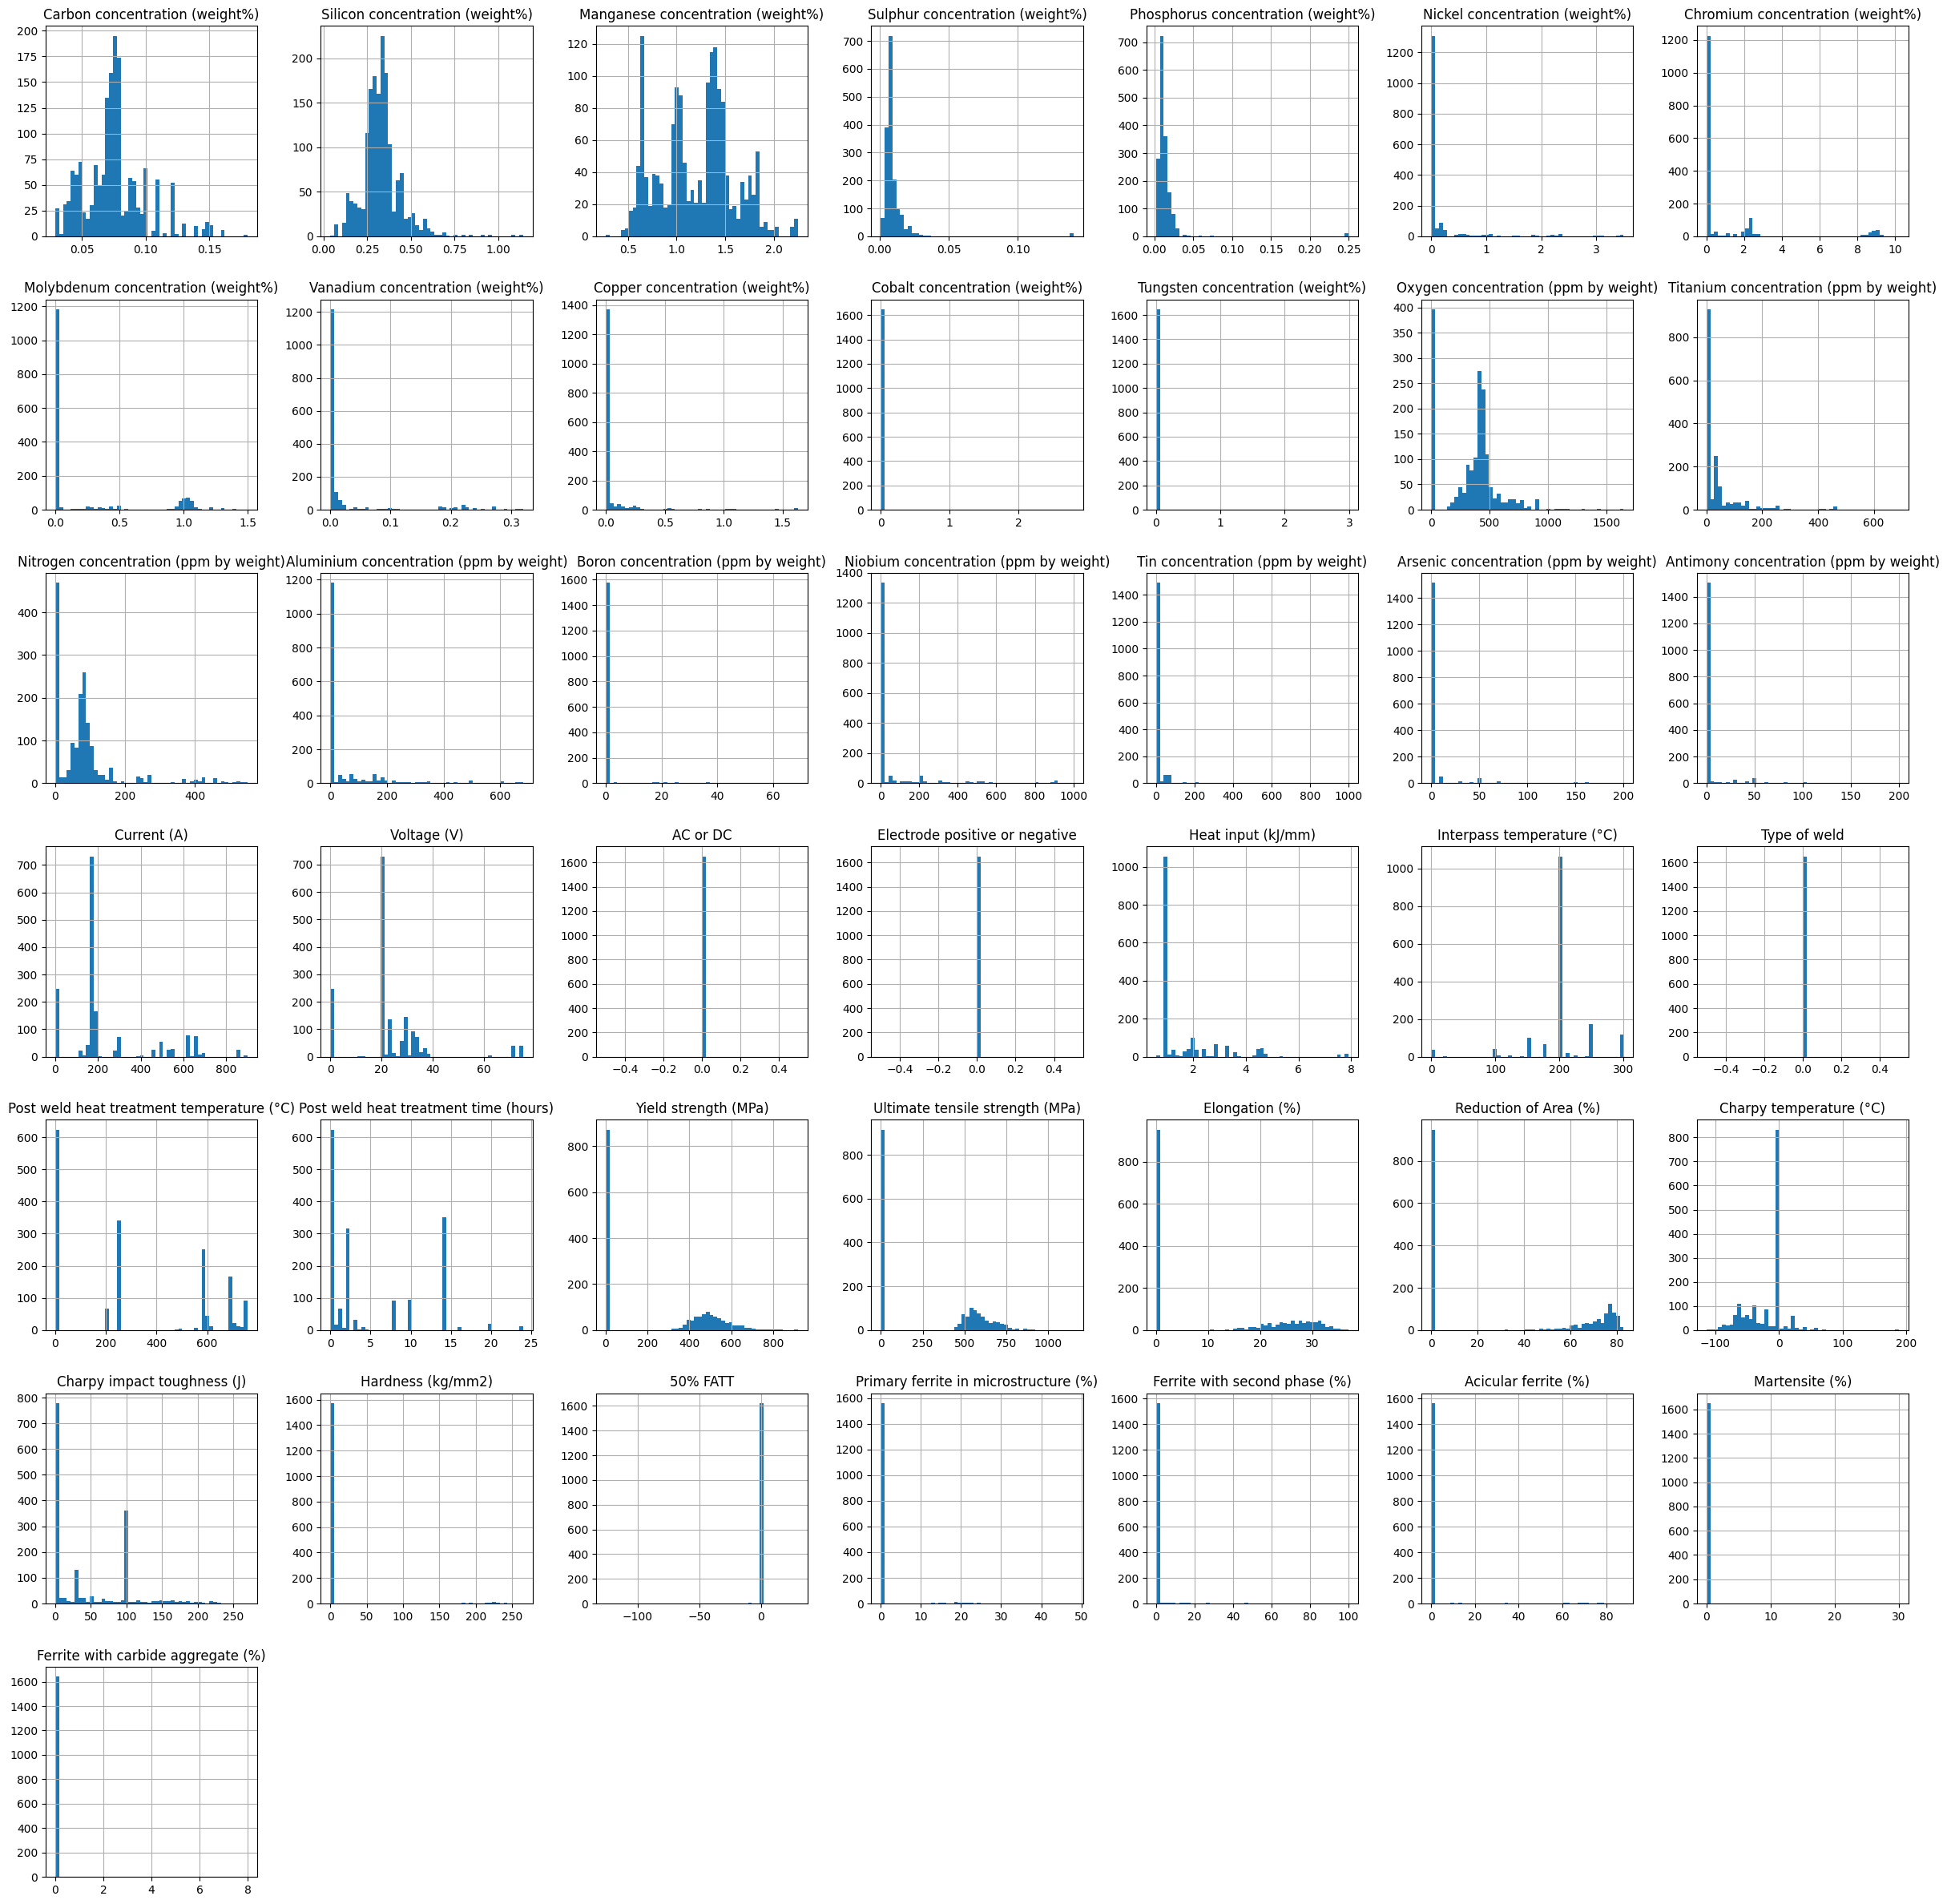

In [70]:
data_numeric.hist(bins = 50, figsize= (30,30))

## Analysis of Yield Strenght

In [59]:
data_yield_strenght = data_numeric[['Carbon concentration (weight%)', 'Silicon concentration (weight%)','Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)','Chromium concentration (weight%)','Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)','Cobalt concentration (weight%)', 'Tungsten concentration (weight%)', 
       'Titanium concentration (ppm by weight)', 'Boron concentration (ppm by weight)', 'Niobium concentration (ppm by weight)', 'Heat input (kJ/mm)', 
       'Interpass temperature (°C)', 'Post weld heat treatment temperature (°C)', 'Post weld heat treatment time (hours)', 'Yield strength (MPa)']]

summary_yield_strenght = pd.DataFrame({
    'Variable': data_yield_strenght.columns,
    'Min': [data_yield_strenght[col].min() for col in data_yield_strenght.columns],
    'Max': [data_yield_strenght[col].max() for col in data_yield_strenght.columns],
    'Mean': [data_yield_strenght[col].mean() for col in data_yield_strenght.columns],
    'Standard Deviation': [data_yield_strenght[col].std() for col in data_yield_strenght.columns]
})

summary_yield_strenght

,Variable,Min,Max,Mean,Standard Deviation
0,Carbon concentration (weight%),0.029,0.18,0.075521,0.023898
1,Silicon concentration (weight%),0.040,1.14,0.328577,0.112455
2,Manganese concentration (weight%),0.270,2.25,1.202821,0.382137
3,Sulphur concentration (weight%),0.001,0.14,0.009561,0.011202
4,Phosphorus concentration (weight%),0.002,0.25,0.012952,0.019567
5,Nickel concentration (weight%),0.000,3.50,0.175108,0.550553
6,Chromium concentration (weight%),0.000,10.20,0.997214,2.333634
7,Molybdenum concentration (weight%),0.000,1.50,0.230002,0.408268
8,Vanadium concentration (weight%),0.000,0.32,0.027188,0.068649
9,Copper concentration (weight%),0.000,1.63,0.060151,0.207850


c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


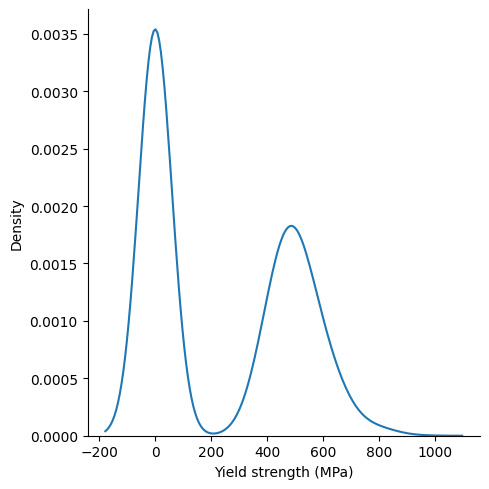

In [90]:
sns.displot(data = data_yield_strenght, x = "Yield strength (MPa)", kind = "kde")

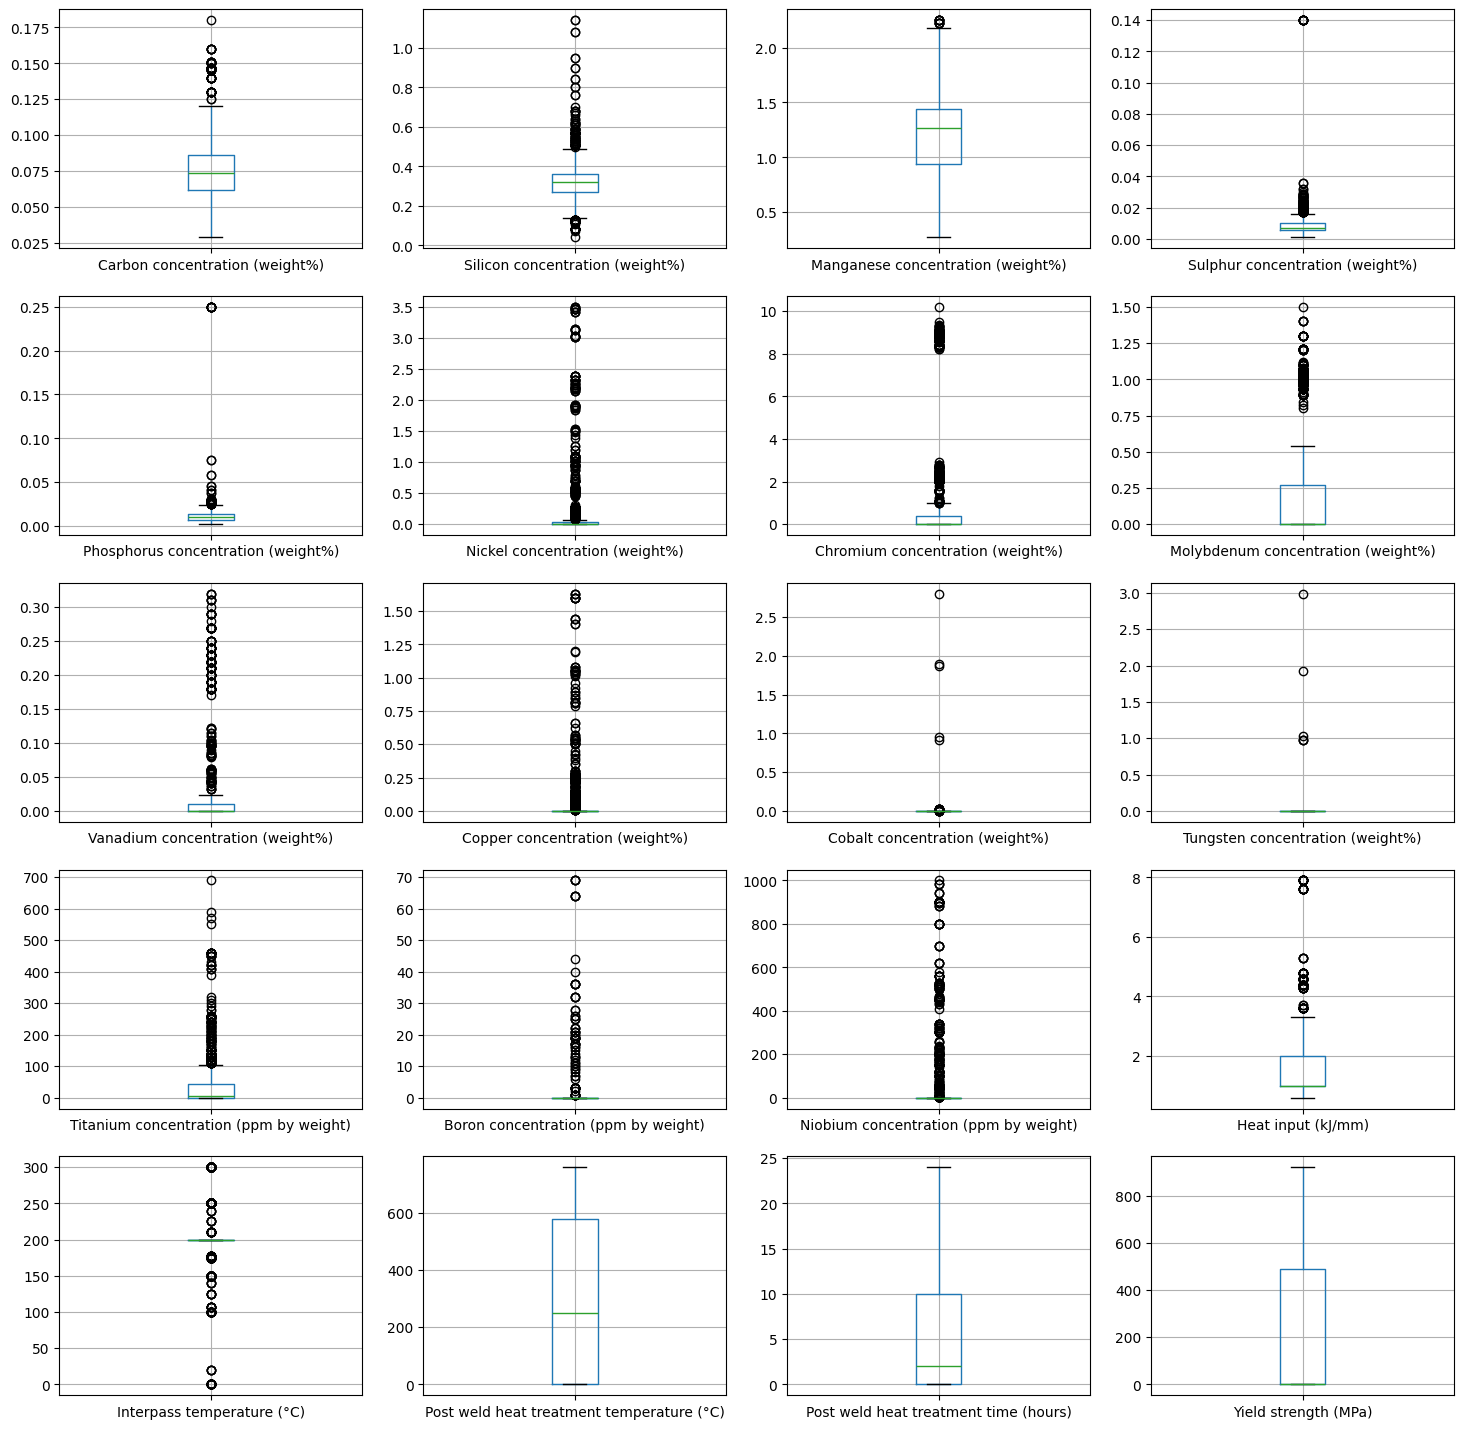

In [101]:
fig, axs = plt.subplots(5,4, figsize = (18,18))

for ax, col in zip(axs.flatten(), data_yield_strenght.columns):
    data_yield_strenght.boxplot(column = col, ax = ax)

<Axes: >

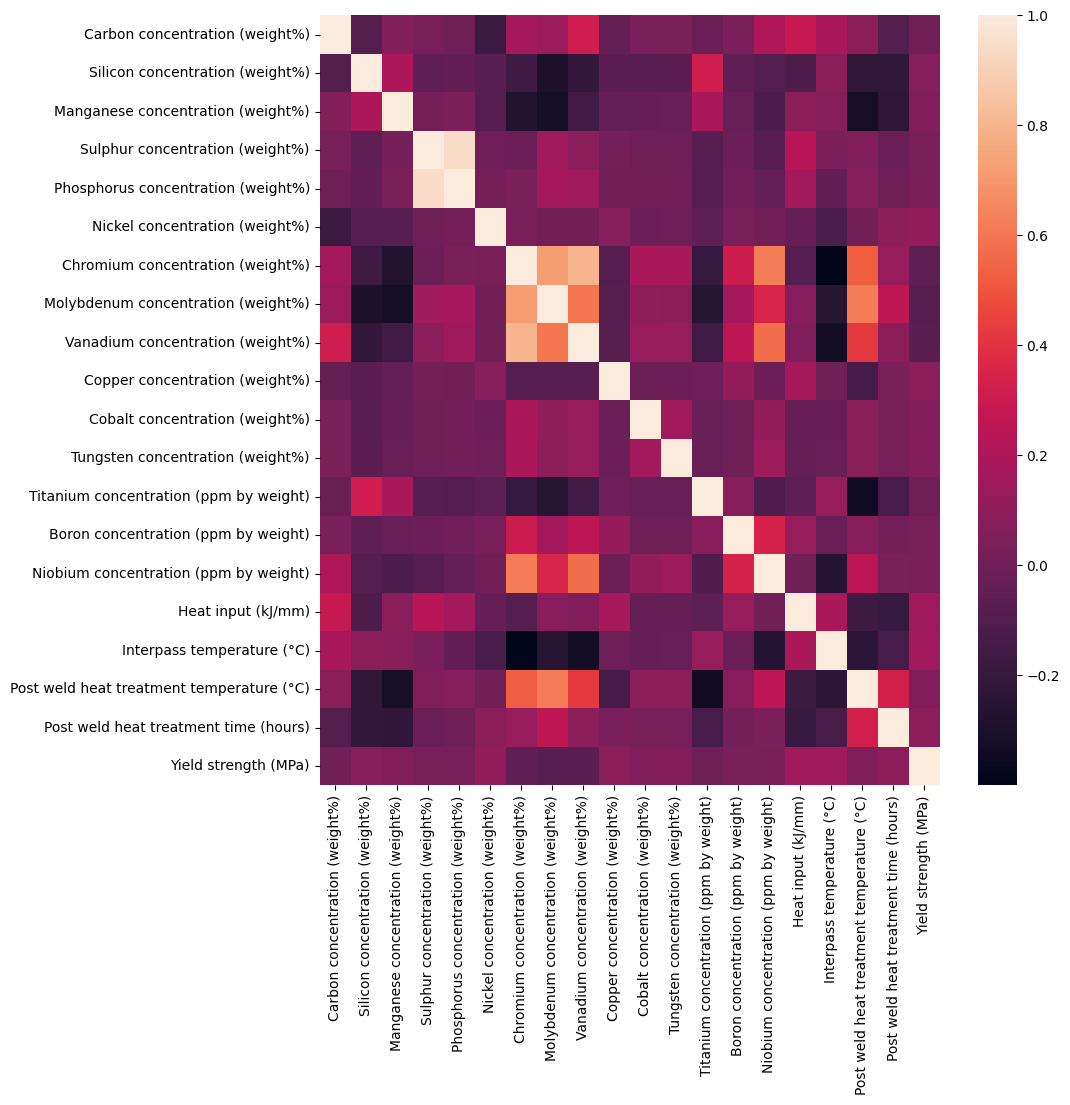

In [76]:
yield_strenght_corr = data_yield_strenght.corr()
plt.figure(figsize= (10,10))
sns.heatmap(yield_strenght_corr)

- Sulphur concentration and Phosphorus concentration are highly correlated, then we must keep only one of them.
- Chromium, Molybdenum and Vanadium concentration are highly correlated, then we must keep only one of them.

### Modeling - Regression

In [106]:
X = data_yield_strenght.drop(columns = ["Yield strength (MPa)", "Sulphur concentration (weight%)", "Chromium concentration (weight%)", "Molybdenum concentration (weight%)"])
y = data_yield_strenght["Yield strength (MPa)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

#As the distributions do not follow a Gaussian pattern, we should use normalization instead of standardization. However, to use standardization, we must remove the outliers with IQR

## Linear Regression
lr_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("MAPE LR :", mean_absolute_percentage_error(y_pred_lr, y_test))

## Ridge Regression
ridge_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Ridge())
    ]
)

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("MAPE Ridge :", mean_absolute_percentage_error(y_pred_ridge, y_test))

## Lasso Regression
lasso_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Lasso())
    ]
)

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("MAPE Lasso :", mean_absolute_percentage_error(y_pred_lasso, y_test))

## ElasticNet Regression
ElasticNet_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", ElasticNet())
    ]
)

ElasticNet_pipeline.fit(X_train, y_train)
y_pred_ElasticNet = ElasticNet_pipeline.predict(X_test)

print("MAPE ElasticNet :", mean_absolute_percentage_error(y_pred_ElasticNet, y_test))

## Decision Tree Regression
tree_pipeline = Pipeline(
    [
        ("Regressor", DecisionTreeRegressor())
    ]
)

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

print("MAPE Decision Tree :", mean_absolute_percentage_error(y_pred_tree, y_test))

## Random Forest Regression
RF_pipeline = Pipeline(
    [
        ("Regressor", RandomForestRegressor())
    ]
)

RF_pipeline.fit(X_train, y_train)
y_pred_RF = RF_pipeline.predict(X_test)

print("MAPE RF:", mean_absolute_percentage_error(y_pred_RF, y_test))

## Gradient Boosting Regression
gb_pipeline = Pipeline(
    [
        ("Regressor", GradientBoostingRegressor())
    ]
)

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

print("MAPE Gradient Boosting:", mean_absolute_percentage_error(y_pred_gb, y_test))



MAPE LR : 2.0192525722714363
MAPE Ridge : 1.3709652450183953
MAPE Lasso : 1.214522568007077
MAPE ElasticNet : 1.0995083236013208
MAPE Decision Tree : 2.7151621043787382e+17
MAPE RF: 5.9663615224700664e+16
MAPE Gradient Boosting: 1.3623104628091711


## Analysis of the Ultimate Tensile Strength

In [60]:
data_uts = data_numeric[['Carbon concentration (weight%)', 'Silicon concentration (weight%)','Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)','Chromium concentration (weight%)','Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)','Cobalt concentration (weight%)', 'Tungsten concentration (weight%)', 
       'Oxygen concentration (ppm by weight)', 'Titanium concentration (ppm by weight)', 'Boron concentration (ppm by weight)', 'Niobium concentration (ppm by weight)', 
       'Heat input (kJ/mm)', 'Interpass temperature (°C)', 'Post weld heat treatment temperature (°C)', 'Post weld heat treatment time (hours)', 'Yield strength (MPa)', 'Ultimate tensile strength (MPa)']]

summary_uts = pd.DataFrame({
    'Variable': data_uts.columns,
    'Min': [data_uts[col].min() for col in data_uts.columns],
    'Max': [data_uts[col].max() for col in data_uts.columns],
    'Mean': [data_uts[col].mean() for col in data_uts.columns],
    'Standard Deviation': [data_uts[col].std() for col in data_uts.columns]
})

summary_uts

,Variable,Min,Max,Mean,Standard Deviation
0,Carbon concentration (weight%),0.029,0.18,0.075521,0.023898
1,Silicon concentration (weight%),0.040,1.14,0.328577,0.112455
2,Manganese concentration (weight%),0.270,2.25,1.202821,0.382137
3,Sulphur concentration (weight%),0.001,0.14,0.009561,0.011202
4,Phosphorus concentration (weight%),0.002,0.25,0.012952,0.019567
5,Nickel concentration (weight%),0.000,3.50,0.175108,0.550553
6,Chromium concentration (weight%),0.000,10.20,0.997214,2.333634
7,Molybdenum concentration (weight%),0.000,1.50,0.230002,0.408268
8,Vanadium concentration (weight%),0.000,0.32,0.027188,0.068649
9,Copper concentration (weight%),0.000,1.63,0.060151,0.207850


c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


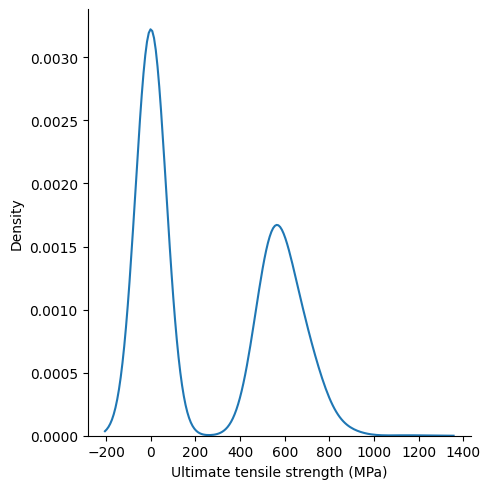

In [92]:
sns.displot(data = data_uts, x = "Ultimate tensile strength (MPa)", kind = "kde")

<Axes: >

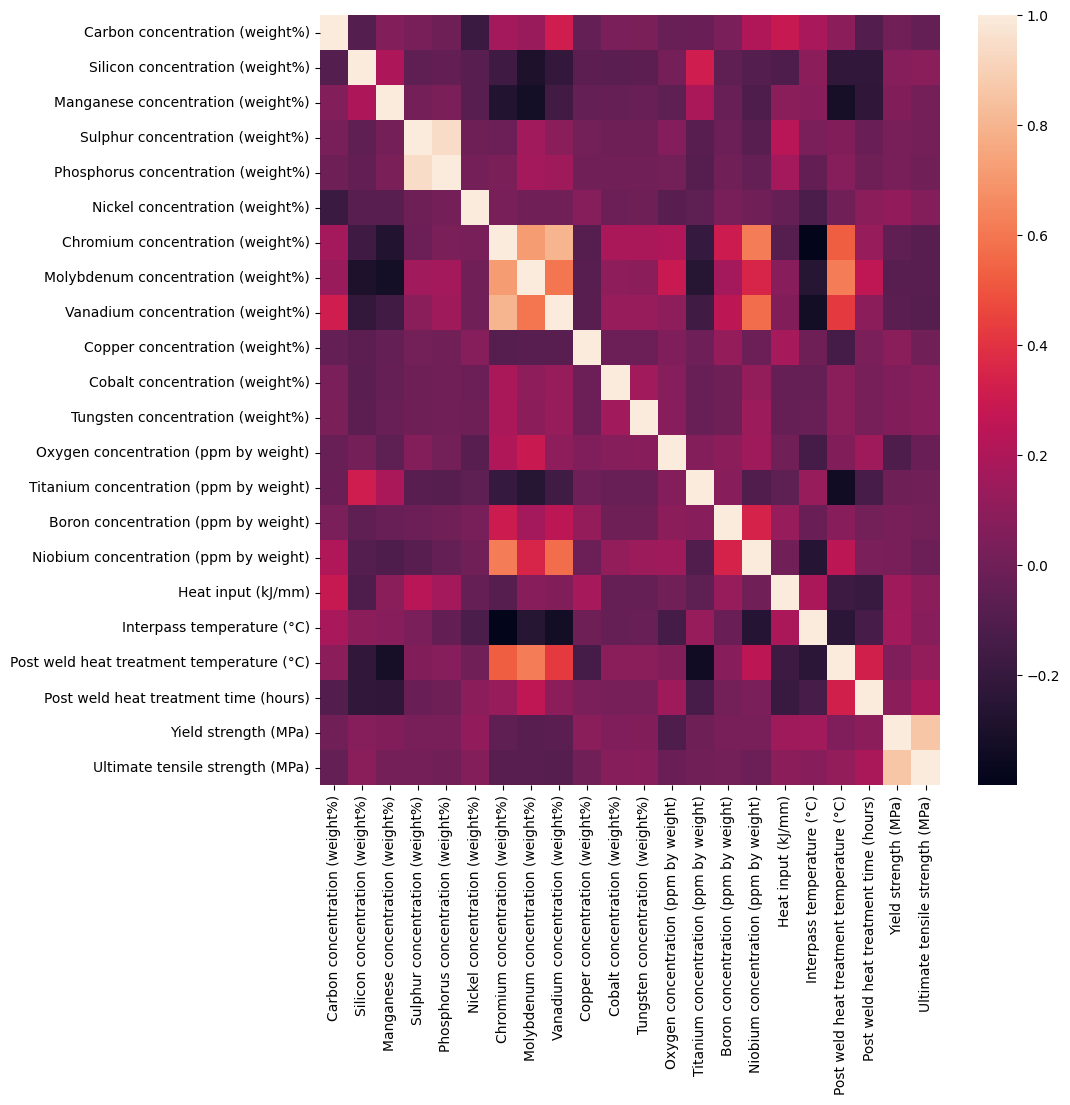

In [77]:
uts_corr = data_uts.corr()
plt.figure(figsize= (10,10))
sns.heatmap(uts_corr)

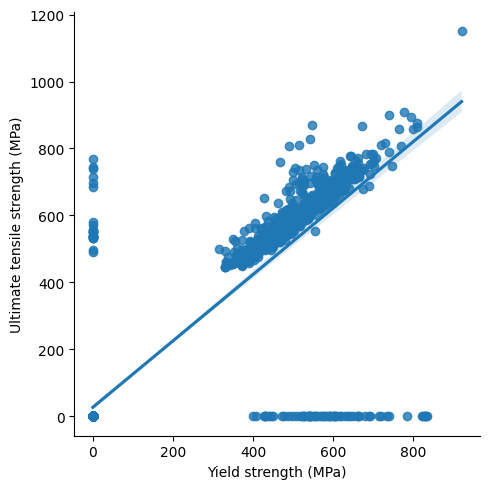

In [93]:
sns.lmplot(data = data_uts, x = "Yield strength (MPa)", y = "Ultimate tensile strength (MPa)")


- Sulphur concentration and Phosphorus concentration are highly correlated, then we must keep only one of them.
- Chromium, Molybdenum and Vanadium concentration are highly correlated, then we must keep only one of them.
- Yield strenght and Ultimate tensile strenght are highly correlated, then we should keep the Yield strenght on the prediction!!

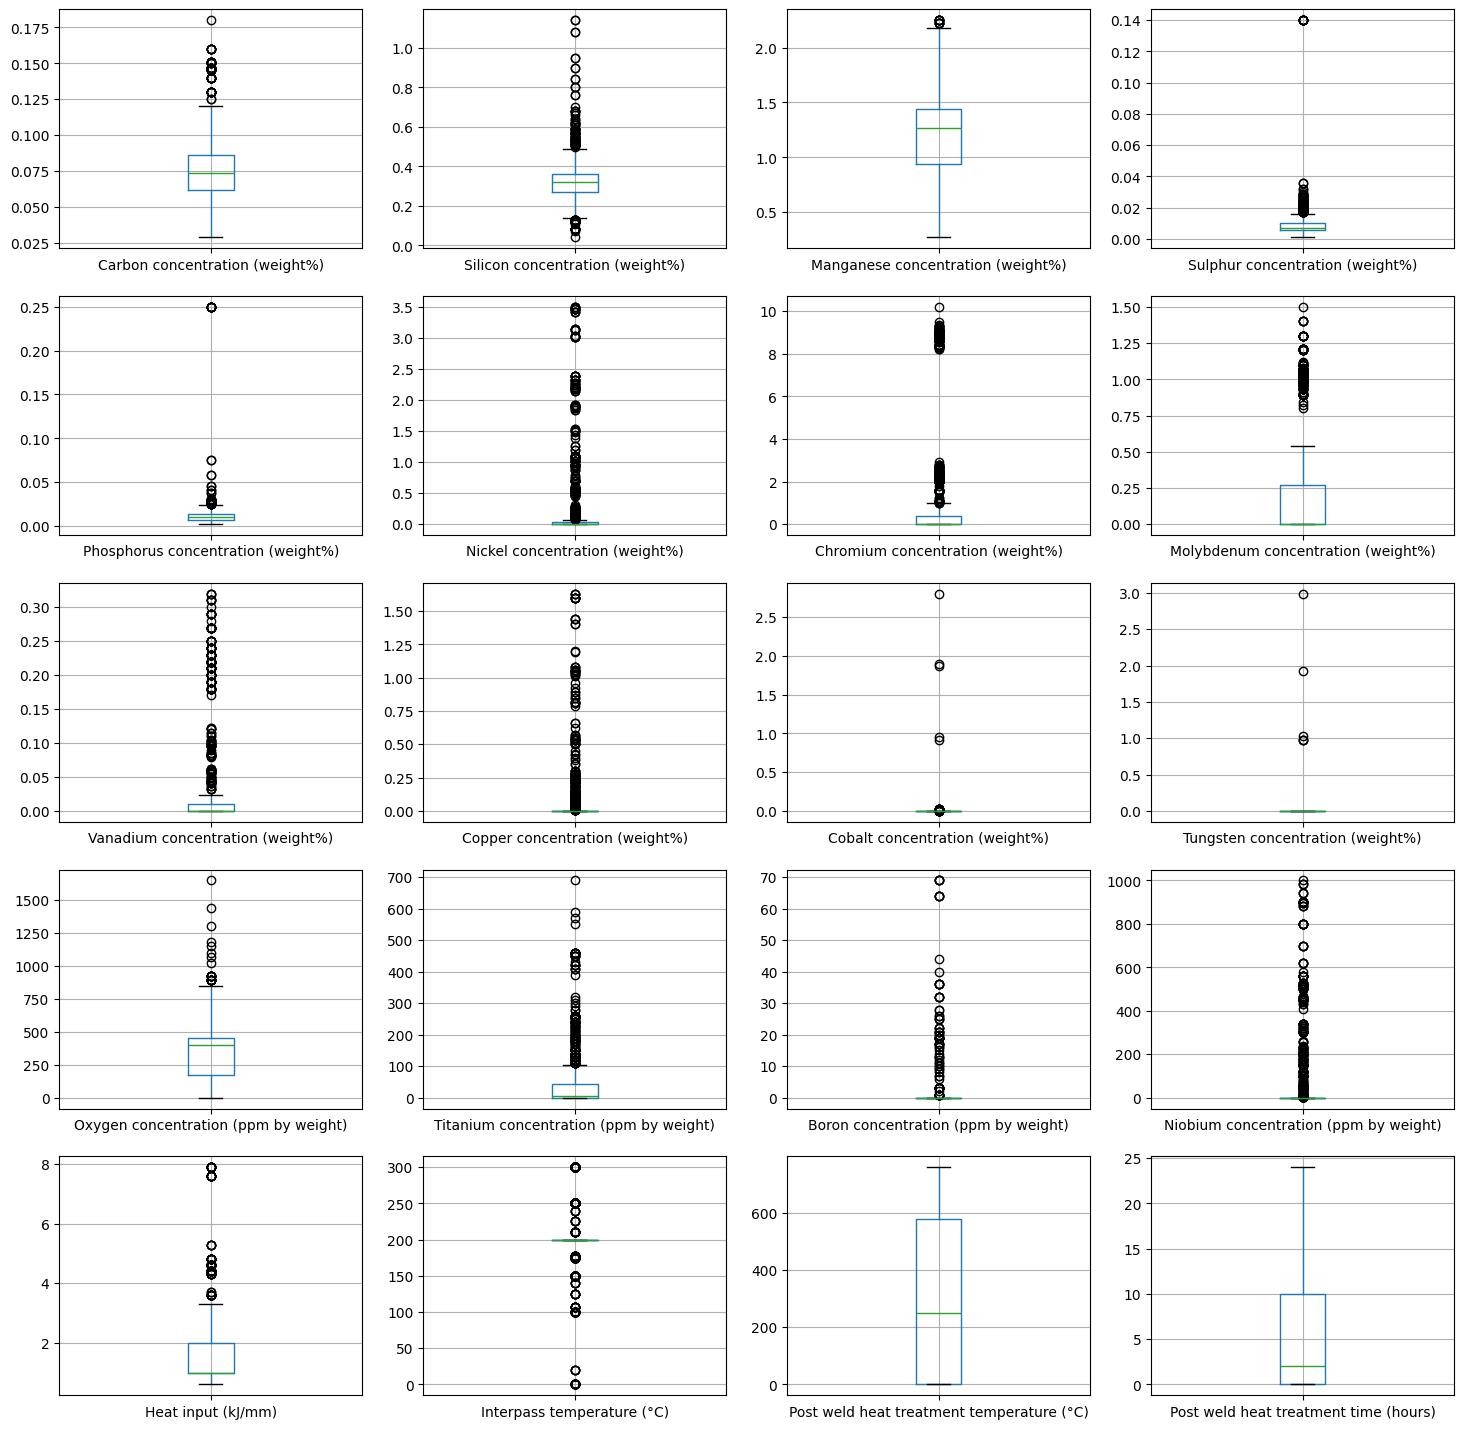

In [102]:
fig, axs = plt.subplots(5,4, figsize = (18,18))

for ax, col in zip(axs.flatten(), data_uts.columns):
    data_uts.boxplot(column = col, ax = ax)

## Modeling - Regression

In [107]:
X = data_uts.drop(columns = ["Ultimate tensile strength (MPa)", "Sulphur concentration (weight%)", "Chromium concentration (weight%)", "Molybdenum concentration (weight%)"])
y = data_uts["Ultimate tensile strength (MPa)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pre Processing 

#As the distributions do not follow a Gaussian pattern, we should use normalization instead of standardization. However, to use standardization, we must remove the outliers with IQR

## Linear Regression
lr_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("MAPE LR :", mean_absolute_percentage_error(y_pred_lr, y_test))

## Ridge Regression
ridge_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Ridge())
    ]
)

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("MAPE Ridge :", mean_absolute_percentage_error(y_pred_ridge, y_test))

## Lasso Regression
lasso_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", Lasso())
    ]
)

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("MAPE Lasso :", mean_absolute_percentage_error(y_pred_lasso, y_test))

## ElasticNet Regression
ElasticNet_pipeline = Pipeline(
    [
        ("Scaler", MinMaxScaler()),
        ("Regressor", ElasticNet())
    ]
)

ElasticNet_pipeline.fit(X_train, y_train)
y_pred_ElasticNet = ElasticNet_pipeline.predict(X_test)

print("MAPE ElasticNet :", mean_absolute_percentage_error(y_pred_ElasticNet, y_test))

## Decision Tree Regression
tree_pipeline = Pipeline(
    [
        ("Regressor", DecisionTreeRegressor())
    ]
)

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

print("MAPE Decision Tree :", mean_absolute_percentage_error(y_pred_tree, y_test))

## Random Forest Regression
RF_pipeline = Pipeline(
    [
        ("Regressor", RandomForestRegressor())
    ]
)

RF_pipeline.fit(X_train, y_train)
y_pred_RF = RF_pipeline.predict(X_test)

print("MAPE RF:", mean_absolute_percentage_error(y_pred_RF, y_test))

## Gradient Boosting Regression
gb_pipeline = Pipeline(
    [
        ("Regressor", GradientBoostingRegressor())
    ]
)

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

print("MAPE Gradient Boosting:", mean_absolute_percentage_error(y_pred_gb, y_test))


MAPE LR : 1.4318323058134383
MAPE Ridge : 1.3217980492248078
MAPE Lasso : 0.7229007371551118
MAPE ElasticNet : 0.9701562360771553
MAPE Decision Tree : 6764479279014152.0
MAPE RF: 0.541662256550747
MAPE Gradient Boosting: 0.6937641197969412
